In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load dataset
df = pd.read_csv('diabetes.csv')  # Download from: https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Display first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()  # No missing values? If yes, handle them with df.fillna() or df.dropna()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


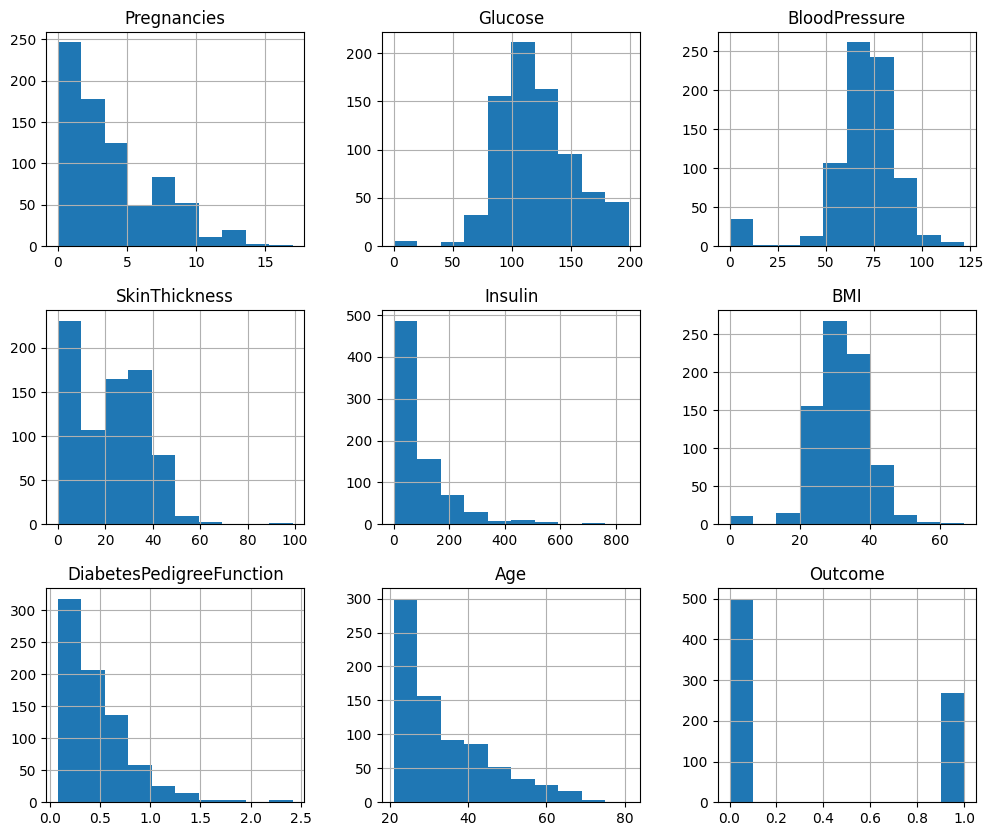

In [6]:
df.hist(figsize=(12, 10))
plt.show()

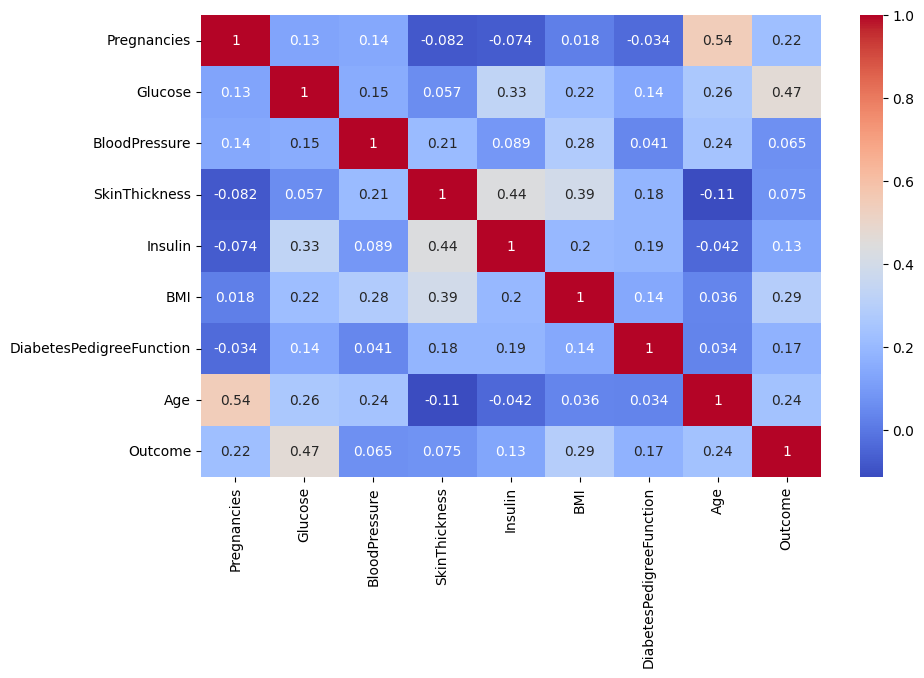

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, df[col].mean())

In [9]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use same scaling for test data

In [12]:
#logistic regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.7662337662337663
[[83 16]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [13]:
#Random Forest (Improved Model)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7662337662337663
[[80 19]
 [17 38]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



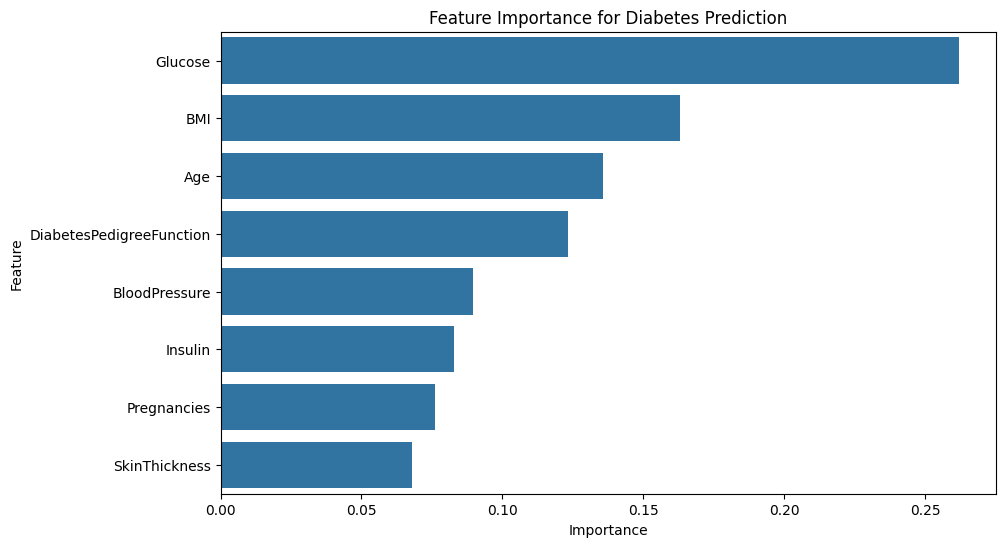

In [14]:
#Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Diabetes Prediction')
plt.show()

In [17]:
# Diabetes Prediction with User Input
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

# Load dataset
df = pd.read_csv('diabetes.csv')  # Make sure you have diabetes.csv in same directory

# Feature Engineering: Add BMI (from height/weight) and clean data
def clean_data(df):
    # Handle zeros in key columns
    cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for col in cols_to_fix:
        df[col] = df[col].replace(0, df[col].mean())
    return df

df = clean_data(df)

# Prepare features (X) and target (y)
X = df[['Glucose', 'BMI', 'Age']]  # Using most important features
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Save model (optional)
joblib.dump(model, 'diabetes_model.pkl')

# PREDICTION FUNCTION
def predict_diabetes():
    print("\n--- Diabetes Risk Calculator ---")
    try:
        # Get user input
        age = float(input("Enter Age: "))
        glucose = float(input("Enter Glucose Level (mg/dL): "))
        height = float(input("Enter Height (cm): "))
        weight = float(input("Enter Weight (kg): "))
        
        # Calculate BMI
        bmi = weight / ((height/100) ** 2)
        
        # Create feature array
        features = np.array([[glucose, bmi, age]])
        
        # Predict
        probability = model.predict_proba(features)[0][1] * 100
        prediction = model.predict(features)[0]
        
        # Output results
        print("\n--- Results ---")
        print(f"BMI: {bmi:.1f}")
        print(f"Diabetes Probability: {probability:.1f}%")
        print(f"Prediction: {'Diabetic' if prediction == 1 else 'Not Diabetic'}")
        print(f"Model Accuracy: {accuracy*100:.1f}%")
        
    except ValueError:
        print("Please enter valid numbers!")

# Run the predictor
predict_diabetes()


--- Diabetes Risk Calculator ---


Enter Age:  50
Enter Glucose Level (mg/dL):  140
Enter Height (cm):  160
Enter Weight (kg):  50



--- Results ---
BMI: 19.5
Diabetes Probability: 13.0%
Prediction: Not Diabetic
Model Accuracy: 74.0%


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
